In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_path = "/kaggle/input/digit-recognizer/"
path = "/kaggle/working/"
num_classes = 10

In [3]:
def creat_data(path, train = True):
    df_train = pd.read_csv(path)
    target = "label"
    if(train):
        X = df_train.drop(columns = [target])
    else:
        X = df_train
    X= np.array(X)
    
    XP = []
    for i in X:
        XP.append(i.reshape(28,28))
    X = np.array(XP)
    
    if(train):
        y = df_train[target] 
        #Convert the labels into one-hot codes.
        y = keras.utils.to_categorical(y, num_classes)
        return X, y        
    return X
    
    


In [4]:
X,y = creat_data(train_path+"train.csv")

In [5]:
X_train , X_val, y_train, y_val = train_test_split(X, y, test_size= 0.2, random_state= 42, shuffle=False)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(33600, 28, 28)
(33600, 10)
(8400, 28, 28)
(8400, 10)


In [6]:
#Expand data dimensions to adapt to the CNN model.
X_train=np.expand_dims(X_train, axis=3)
X_val=np.expand_dims(X_val, axis=3)

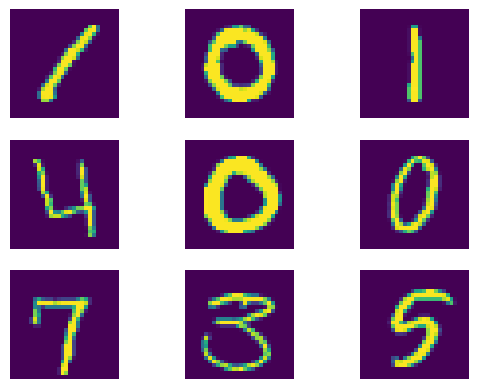

In [7]:
plt.figure()
for i in range(0,9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i])
    #plt.ylabel(y[i].numpy())
    plt.axis('off')
plt.show()

In [8]:
model=keras.Sequential() #Create a network sequence.
##Add the first convolutional layer and pooling layer.
model.add(keras.layers.Conv2D(filters=32,kernel_size = 5,strides = (1,1),
                              padding = 'same',activation = tf.nn.relu,input_shape = (28,28,1)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))

##Add the second convolutional layer and pooling layer.
model.add(keras.layers.Conv2D(filters=64,kernel_size = 3,strides = (1,1),padding = 'same',activation = tf.nn.relu))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))
##Add a dropout layer to reduce overfitting.
model.add(keras.layers.Dropout(0.1))

##Add the third convolutional layer and pooling layer.
model.add(keras.layers.Conv2D(filters=128,kernel_size = 3,strides = (1,1),padding = 'same',activation = tf.nn.relu))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))
##Add a dropout layer to reduce overfitting.
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Flatten())
##Add two fully connected layers.
model.add(keras.layers.Dense(units=128,activation = tf.nn.relu))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(units=10,activation = tf.nn.softmax))
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x795269e51060>>

In [9]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='accuracy', patience=4, verbose = 1, mode='max', restore_best_weights = True)
learning_rate_reduction = keras.callbacks.ReduceLROnPlateau(
    monitor = 'accuracy',
    patience = 4,
    verbose = 1,
    factor = 0.3,
    min_lr = 0.000001)
checkpoint = keras.callbacks.ModelCheckpoint('/kaggle/working/best_model.hdf5', monitor = ['val_iou_score'], verbose = 1, mode = 'max')


In [10]:

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
history = model.fit(x=X_train,y=y_train,validation_data =(X_val, y_val) ,epochs=20,batch_size=32,
                   callbacks= [early_stop, learning_rate_reduction,checkpoint])

Epoch 1/20


2024-01-13 17:42:28.094690: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1040/1050 [============================>.] - ETA: 0s - loss: 0.4789 - accuracy: 0.8804
Epoch 1: saving model to /kaggle/working/best_model.hdf5
1050/1050 [==============================] - 9s 5ms/step - loss: 0.4754 - accuracy: 0.8812 - val_loss: 0.0802 - val_accuracy: 0.9777 - lr: 0.0010
Epoch 2/20
  45/1050 [>.............................] - ETA: 3s - loss: 0.1336 - accuracy: 0.9576

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1045/1050 [============================>.] - ETA: 0s - loss: 0.1131 - accuracy: 0.9673
Epoch 2: saving model to /kaggle/working/best_model.hdf5
1050/1050 [==============================] - 4s 4ms/step - loss: 0.1129 - accuracy: 0.9673 - val_loss: 0.0483 - val_accuracy: 0.9854 - lr: 0.0010
Epoch 3/20
1041/1050 [============================>.] - ETA: 0s - loss: 0.0874 - accuracy: 0.9745
Epoch 3: saving model to /kaggle/working/best_model.hdf5
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0879 - accuracy: 0.9744 - val_loss: 0.0542 - val_accuracy: 0.9835 - lr: 0.0010
Epoch 4/20
1040/1050 [============================>.] - ETA: 0s - loss: 0.0811 - accuracy: 0.9774
Epoch 4: saving model to /kaggle/working/best_model.hdf5
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0819 - accuracy: 0.9773 - val_loss: 0.0469 - val_accuracy: 0.9854 - lr: 0.0010
Epoch 5/20
1046/1050 [============================>.] - ETA: 0s - loss: 0.0711 - accuracy: 0.9792
Epoch 5: s

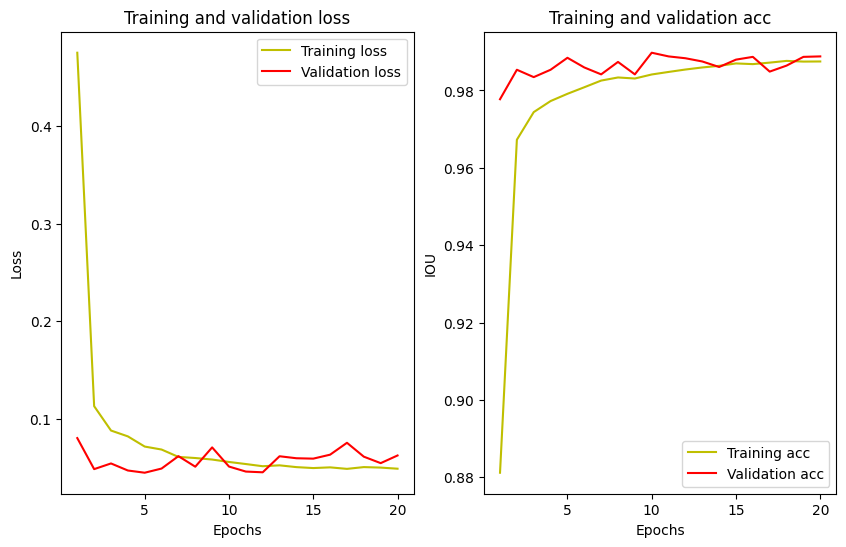

In [12]:
#plot the training and validation accuracy and loss at each epoch
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('IOU')
plt.legend()
plt.show()

In [13]:
X_test= creat_data(train_path+"test.csv",train = False)

In [14]:
X_test=np.expand_dims(X_test, axis=3)


In [15]:
y_test = model.predict(X_test)
y_test.shape

875/875 [==============================] - 2s 2ms/step


In [17]:
test_predictions = np.argmax(y_test, axis=1)
test_predictions[0:5]

array([2, 0, 9, 9, 3])

prediction results of the first 5 images:
2,0,9,9,3,	
first 5 images in the test set:


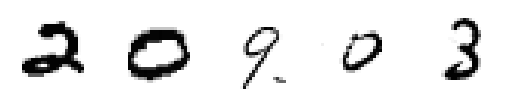

In [27]:
#Visualize test set output results.
import matplotlib.pyplot as plt
%matplotlib inline
def res_Visual(n):
    fig, ax = plt.subplots(nrows=int(n/5),ncols=5 )
    ax = ax.flatten()
    print('prediction results of the first {} images:'.format(n))
    for i in range(n):
        #print(final_opt_a[i],end=',')
        print(test_predictions[i], end=',')
        if int((i+1)%5) ==0:
            print('\t')
        #Visualize image display.
        img = X_test[i]#Read each row of data in the format of Ndarry.
        plt.axis("off")
        ax[i].imshow(img, cmap='Greys', interpolation='nearest')#Visualization
        ax[i].axis("off")
    print('first {} images in the test set:'.format(n))
res_Visual(5)

In [28]:
ids = np.array(range(1,test_predictions.shape[0]+1))
ids.shape

(28000,)

In [29]:
columns=["ImageId","Label"]
frame = pd.DataFrame([ids,test_predictions],index=columns).T.set_index("ImageId")

frame.head()

,Label
ImageId,
1,2
2,0
3,9
4,9
5,3


In [30]:
frame.to_csv('/kaggle/working/sub1.csv')